In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [76]:
df=pd.read_csv("TASK-ML-INTERN.csv")

In [77]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [78]:
df.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

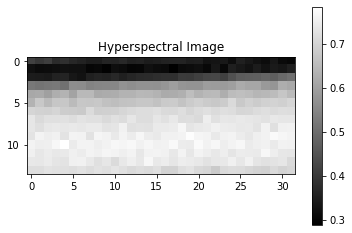

In [79]:
# check image
data=df.iloc[:,1:-1]
arr=data.iloc[0].values
img_shape=(14,32)
arr=arr.reshape(img_shape)

plt.imshow(arr, cmap='gray')
plt.colorbar()
plt.title("Hyperspectral Image")
plt.show()

In [80]:
df.isnull().sum()  # check missing values

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [81]:
df.info()  # Detailed Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [82]:
# check basic statistics
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [83]:
# check duplicate values
data.duplicated().sum()

0

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


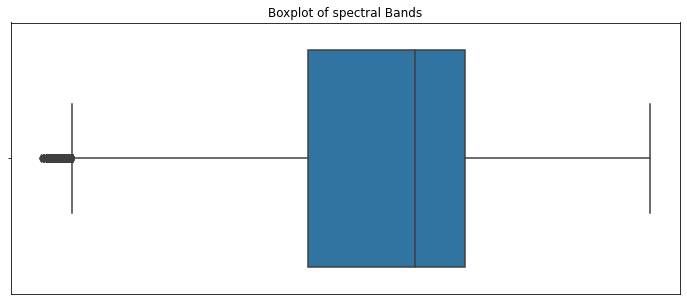

In [84]:
# check outliers
data1=df.iloc[:,1:-1].values
plt.figure(figsize=(12,5))
sns.boxplot(data1)
plt.xticks([])
plt.title("Boxplot of spectral Bands")
plt.show()

In [85]:
# Using IQR Method to remove Outliers
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data_filter=data[(data>lower_limit) & (data<upper_limit)]
data_filter=data_filter.dropna()

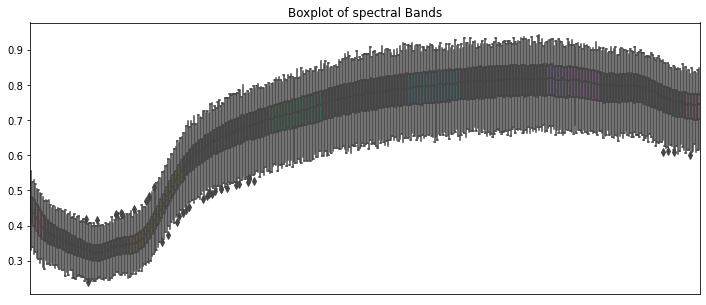

In [86]:
data_filter1=data_filter.values
plt.figure(figsize=(12,5))
sns.boxplot(data=data_filter1)
plt.xticks([])
plt.title("Boxplot of spectral Bands")
plt.show()

In [87]:
# scale the datapoints
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_filter)
standardized_data

array([[-0.68115678, -1.05940625, -0.60953352, ..., -0.56288154,
        -0.85417701, -0.71928353],
       [-0.69033782, -0.91727331, -0.75846957, ..., -0.88303247,
        -0.87917463, -1.06468177],
       [-1.32989887, -1.65554089, -1.44190398, ..., -1.724472  ,
        -1.44205863, -1.59794347],
       ...,
       [ 0.99923019,  1.3710871 ,  1.5055491 , ...,  0.74318   ,
         0.59176062,  1.35028114],
       [ 0.47534332,  1.31178483,  1.24812768, ...,  0.37163142,
         0.28989265,  0.43898498],
       [ 0.38565439,  0.35460262, -0.01467499, ..., -0.64616628,
        -0.1536253 , -0.40246506]])

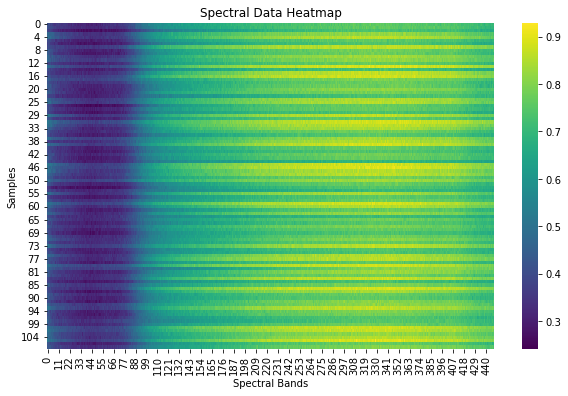

In [88]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_filter.iloc[:100], cmap='viridis', cbar=True)  # Visualizing first 100 samples
plt.xlabel("Spectral Bands")
plt.ylabel("Samples")
plt.title("Spectral Data Heatmap")
plt.show()

In [89]:
pca=PCA(n_components=50)
pca_data=pca.fit_transform(standardized_data)

explained_var = pca.explained_variance_ratio_
print(f"Explained variance by first 10 components: {explained_var}")

Explained variance by first 10 components: [8.46465944e-01 6.37006103e-02 2.51381273e-02 1.15442615e-02
 2.78500990e-03 1.05387814e-03 6.18832779e-04 5.37929062e-04
 5.14080225e-04 4.99115104e-04 4.88516885e-04 4.74857883e-04
 4.68960957e-04 4.59938833e-04 4.57599934e-04 4.44406254e-04
 4.42821175e-04 4.32238262e-04 4.29361873e-04 4.25243334e-04
 4.19330137e-04 4.12202634e-04 4.02583606e-04 4.00401952e-04
 3.92943471e-04 3.90900065e-04 3.88191103e-04 3.84595128e-04
 3.79148583e-04 3.70449487e-04 3.68738137e-04 3.63748277e-04
 3.60509517e-04 3.57365513e-04 3.53524088e-04 3.49544197e-04
 3.45393082e-04 3.44849084e-04 3.36389701e-04 3.31559457e-04
 3.30640096e-04 3.25174590e-04 3.23215115e-04 3.19881702e-04
 3.18071238e-04 3.14048328e-04 3.09604000e-04 3.09006607e-04
 3.04602592e-04 2.99013499e-04]


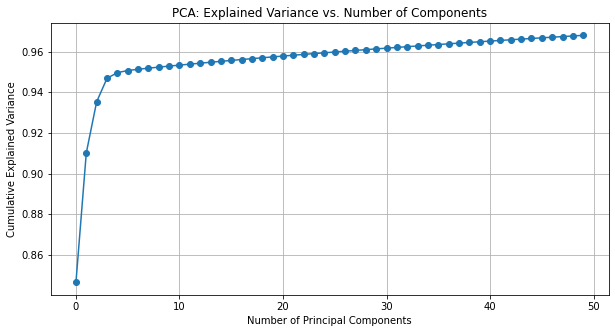

In [90]:
# Plot PCA Variance Explained
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.grid()
plt.show()

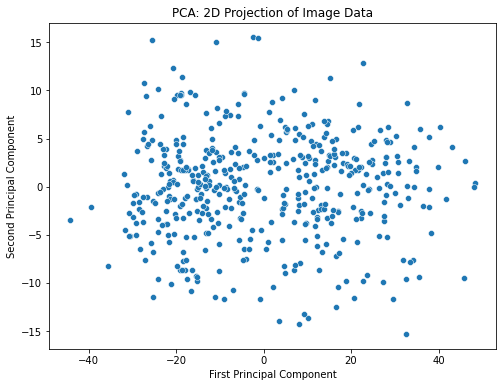

In [91]:
# Visualize First Two PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA: 2D Projection of Image Data")
plt.show()

In [92]:
# Apply t-sne
tsne=TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data=tsne.fit_transform(standardized_data)

d:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


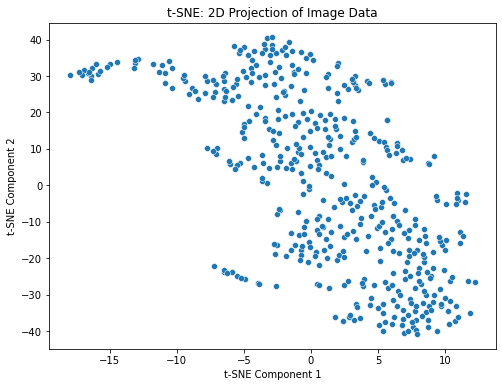

In [93]:
# Visualize t-sne 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE: 2D Projection of Image Data")
plt.show()

In [94]:
# Applying cnn Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.losses import MeanSquaredError

In [95]:
x=pca_data
y=df['vomitoxin_ppb']
y=y.iloc[:x.shape[0]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(50,)),  # Match PCA output features
    Dense(32, activation='relu'),
    Dense(1)  # Regression or classification output
])
model.compile(optimizer=Adam(learning_rate=0.001),loss=MeanSquaredError(), metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20


d:\anaconda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1598 - loss: 106658792.0000 - val_accuracy: 0.0323 - val_loss: 329718912.0000
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0342 - loss: 168045232.0000 - val_accuracy: 0.0108 - val_loss: 329705664.0000
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 178033840.0000 - val_accuracy: 0.0000e+00 - val_loss: 329691616.0000
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 106686760.0000 - val_accuracy: 0.0000e+00 - val_loss: 329676608.0000
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 203366224.0000 - val_accuracy: 0.0000e+00 - val_loss: 329656576.0000
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 197731248.0000 - val_accuracy: 0.0000e+00 - val_loss: 329633984.0000
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 209094864.0000 - val_accuracy: 0.0000e+

In [97]:
# Predict on test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B211DD7D30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Mean Absolute Error (MAE): 3882.68299599104
Root Mean Squared Error (RMSE): 18109.96719663355
R² Score: -0.045573214595061584


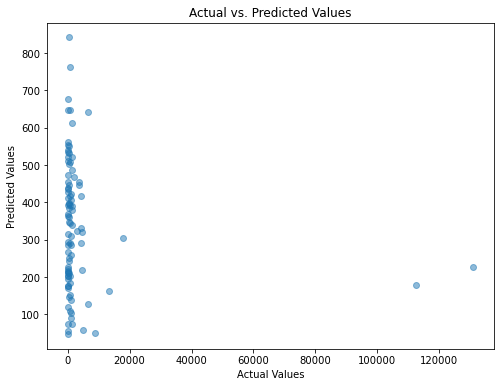

In [98]:
# Plotting graph
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [99]:
model.save("cnn_model.h5")